In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
import pickle
import pandas as pd
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn-white', )
plt.rcParams['axes.labelsize'] =  25
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0

from fisher_calculators import get_fisher_orientations

In [2]:
from torchvision import models, transforms, utils

In [3]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [4]:
import sys
sys.path.insert(1, '../single_patch_orientation')
from orientation_stim import broadband_noise, gabor, grating, circular_mask


##### Define some generators to get Fisher for.

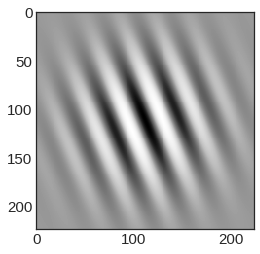

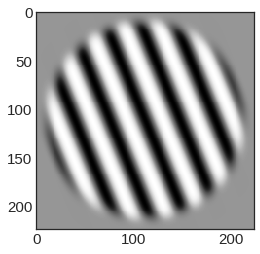

In [8]:
a = np.pi/8
generator_gabor = lambda a: torch.from_numpy(gabor(size=224, pixelsPerDegree=100, spatial_freq=3, spatial_phase=0,
          orientation=-a, contrast=1, sigma=.5, spatial_aspect_ratio=1)).expand(3,224,224)
plt.imshow(generator_gabor(a)[0])
plt.show()


mask = circular_mask(224, 100, radius = 1, polarity_out=0,polarity_in=1,
                     if_filtered=True, filter_size=(50, 50), filter_width=5)
generator_grating = lambda a: torch.from_numpy(np.multiply(
                            grating(size=224, pixelsPerDegree=100, spatial_freq=3, spatial_phase=0,
            orientation=np.pi/2+a, contrast=1),mask)).expand(3,224,224)
plt.imshow(generator_grating(a)[0])
plt.show()


## Normal alexnet

response size torch.Size([1, 192, 27, 27])


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

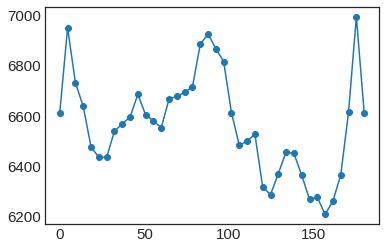

In [17]:

# model = models.alexnet(pretrained=True)
# # checkpoint = torch.load(which_alexnet)
# # model.load_state_dict(checkpoint['state_dict'])

# model.cuda().eval()



fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_gabor)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")
# plt.show()
# fishers_alexnet = get_fisher_orientations(model,6,40,generator = generator_grating)
# plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")
model

## Trained on hamming-filtered images

In [7]:
which_alexnet = 'alexnet_hamming/checkpoint.pth.tar'

In [8]:
model = models.__dict__['AlexNet']().cuda()

checkpoint = torch.load(which_alexnet)
model.load_state_dict(checkpoint['state_dict'])

model.eval();



response size torch.Size([1, 192, 27, 27])


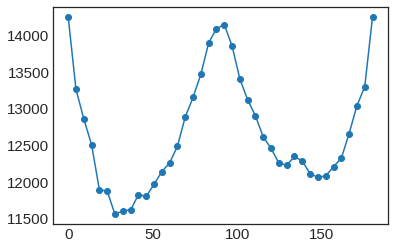

response size torch.Size([1, 192, 27, 27])


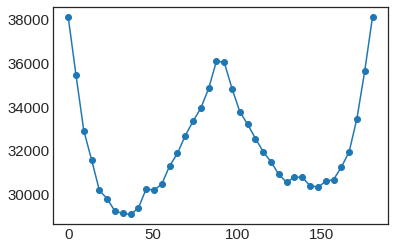

In [9]:
fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_gabor)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")
plt.show()
fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_grating)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")


## Trained on Hamming-filtered, rotated images.

In [10]:
which_alexnet = 'alexnet_hamming_r45/checkpoint.pth.tar'

In [11]:
model = models.__dict__['AlexNet']().cuda()

checkpoint = torch.load(which_alexnet)
model.load_state_dict(checkpoint['state_dict'])

model.eval();


response size torch.Size([1, 192, 27, 27])


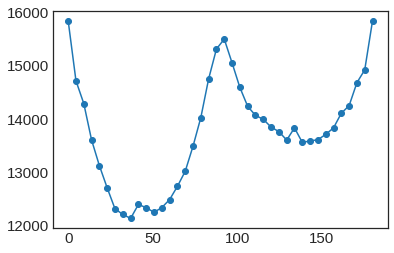

response size torch.Size([1, 192, 27, 27])


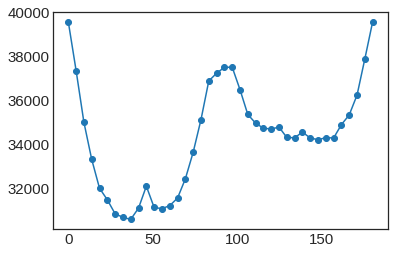

In [12]:
fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_gabor)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")
plt.show()
fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_grating)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")


## Trained on Hamming-filtered, cardinal-filtered images.

In [13]:
which_alexnet = 'alexnet_hamming_cardinalFilter/checkpoint.pth.tar'

In [14]:
model = models.__dict__['AlexNet']().cuda()

checkpoint = torch.load(which_alexnet)
model.load_state_dict(checkpoint['state_dict'])

model.eval();



response size torch.Size([1, 192, 27, 27])


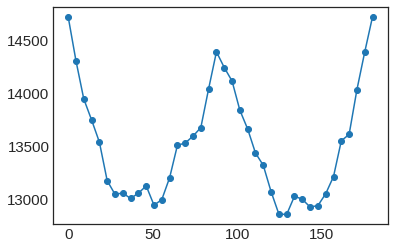

response size torch.Size([1, 192, 27, 27])


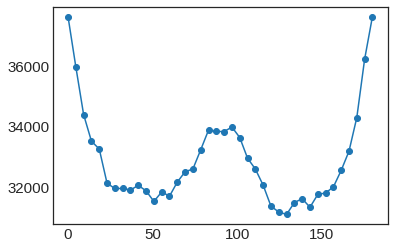

In [15]:
fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_gabor)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")
plt.show()
fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_grating)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")


## Trained on Hamming-filtered, rotated images, then we zero out the corners of weights

response size torch.Size([1, 192, 27, 27])


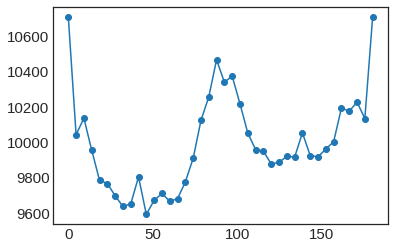

response size torch.Size([1, 192, 27, 27])


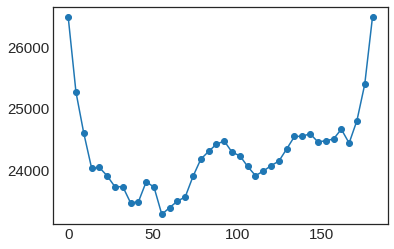

In [33]:
which_alexnet = 'alexnet_hamming_r45/checkpoint.pth.tar'

# from Alexnet_circular import AlexNet_circular

model = AlexNet_diamond().cuda()

checkpoint = torch.load(which_alexnet)
model.load_state_dict(checkpoint['state_dict'])

model.eval()



fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_gabor)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")
plt.show()
fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_grating)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")

## Trained on Hamming-filtered (not rotated) images with circular convolutions

In [17]:
which_alexnet = 'alexnet_hamming_circ/checkpoint.pth.tar'

model = AlexNet_circular().cuda()

checkpoint = torch.load(which_alexnet)
model.load_state_dict(checkpoint['state_dict'])

model.eval()



fishers_alexnet = get_fisher_orientations(model,0,40,generator = generator_gabor)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")
plt.show()
fishers_alexnet = get_fisher_orientations(model,0,40,generator = generator_grating)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")


FileNotFoundError: [Errno 2] No such file or directory: 'alexnet_hamming_circ/checkpoint.pth.tar'

## Trained on Hamming-filtered, rotated images with circular convolutions

In [18]:
from Alexnet_circular import AlexNet_circular

response size torch.Size([1, 192, 27, 27])


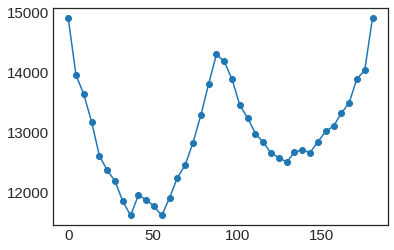

response size torch.Size([1, 192, 27, 27])


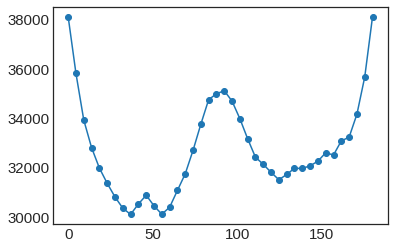

In [23]:
which_alexnet = 'alexnet_hamming_circ_r45_2/checkpoint.pth.tar'

model = AlexNet_circular().cuda()

checkpoint = torch.load(which_alexnet)
model.load_state_dict(checkpoint['state_dict'])

model.eval()



fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_gabor)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")
plt.show()
fishers_alexnet = get_fisher_orientations(model,3,40,generator = generator_grating)
plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet),"-o")


In [20]:
def show(img):
    npimg = img.detach().cpu().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


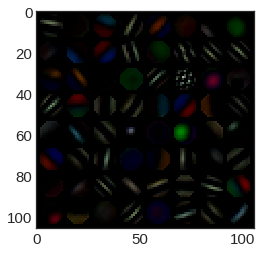

In [21]:
## check that the model has circular filters
show(utils.make_grid(model.features[0].weight))

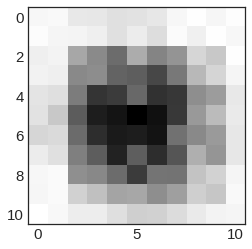

In [57]:
plt.imshow(torch.mean(torch.abs(model.features[0].weight),axis=[0,1]).detach().cpu())

In [ ]:
plt.imshow(model.features[0].mask.detach().cpu().numpy())

In [ ]:
break

In [30]:
def make_diamond(mask):
    """From a 2d array of all zeros we make the center ellipse all 1s, zeros outside"""
    s = mask.size()
    assert len(s)==2
    for row in torch.arange(0,s[0], dtype = torch.float):
        for col in torch.arange(0,s[1],dtype = torch.float):
            dist =  (torch.abs(.5+row-s[0]/2))/(s[0]/2) + torch.abs((.5+col-s[1]/2)/(s[1]/2))
            if dist < 1:
                mask[int(row),int(col)] = 1
                
    return mask
make_diamond(torch.zeros(11,11))

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [32]:

from torch.nn.modules.conv import _ConvNd
import math
import torch
from torch.nn.parameter import Parameter
import torch.nn.functional as F
import torch.nn.init
from torch.nn import Module
from torch.nn.modules.utils import _single, _pair, _triple
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torch.multiprocessing as mp
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

def make_circle(mask):
    """From a 2d array of all zeros we make the center ellipse all 1s, zeros outside"""
    s = mask.size()
    assert len(s)==2
    for row in torch.arange(0,s[0], dtype = torch.float):
        for col in torch.arange(0,s[1],dtype = torch.float):
            dist =  torch.sqrt(((.5+row-s[0]/2)**2)/(s[0]/2)**2 + ((.5+col-s[1]/2)**2)/(s[1]/2)**2)
            if dist < 1:
                mask[int(row),int(col)] = 1
                
    return mask

def make_diamond(mask):
    """From a 2d array of all zeros we make the center ellipse all 1s, zeros outside"""
    s = mask.size()
    assert len(s)==2
    for row in torch.arange(0,s[0], dtype = torch.float):
        for col in torch.arange(0,s[1],dtype = torch.float):
            dist =  (torch.abs(.5+row-s[0]/2))/(s[0]/2) + torch.abs((.5+col-s[1]/2)/(s[1]/2))
            if dist < 1:
                mask[int(row),int(col)] = 1
                
    return mask

class diam_Conv2d(_ConvNd):
    """Edited version of conv2d"""
    def __init__(self, in_channels, out_channels, kernel_size, stride=1,
                 padding=0, dilation=1, groups=1,
                 bias=True, padding_mode='zeros'):
        kernel_size = _pair(kernel_size)
        stride = _pair(stride)
        padding = _pair(padding)
        dilation = _pair(dilation)
        super(diam_Conv2d, self).__init__(
            in_channels, out_channels, kernel_size, stride, padding, dilation,
            False, _pair(0), groups, bias, padding_mode)
        
        mask = torch.zeros_like(self.weight[0,0])
        self.mask = make_diamond(mask)
        
    def _apply(self, fn):
        """So the mask is moved to device too."""
        super(diam_Conv2d, self)._apply(fn)
        self.mask = fn(self.mask)
        return self

    def conv2d_forward_masked(self, input, weight):
        # apply the mask. we're not freezing the weights but they'll always be zero
        self.weight.data.mul_(self.mask)
        
        if self.padding_mode == 'circular':
            expanded_padding = ((self.padding[1] + 1) // 2, self.padding[1] // 2,
                                (self.padding[0] + 1) // 2, self.padding[0] // 2)
            return F.conv2d(F.pad(input, expanded_padding, mode='circular'),
                            weight, self.bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, self.bias, self.stride,
                        self.padding, self.dilation, self.groups)

    def forward(self, input):
        return self.conv2d_forward_masked(input, self.weight)

class AlexNet_diamond(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNet_diamond, self).__init__()
        self.features = nn.Sequential(
            circ_Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            circ_Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            circ_Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            circ_Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [5]:
m_untrained = models.vgg16(pretrained=False)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/abenjamin/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:24<00:00, 22.2MB/s] 


In [6]:
m

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

response size torch.Size([1, 64, 55, 55])


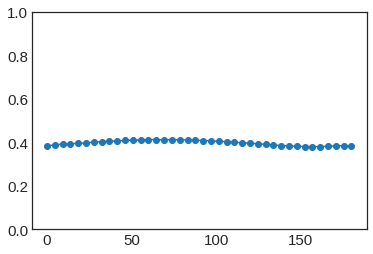

response size torch.Size([1, 64, 55, 55])


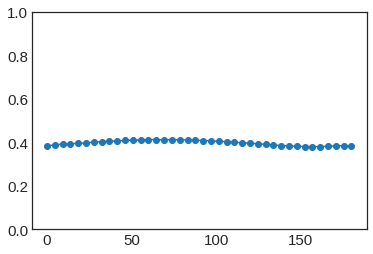

response size torch.Size([1, 64, 27, 27])


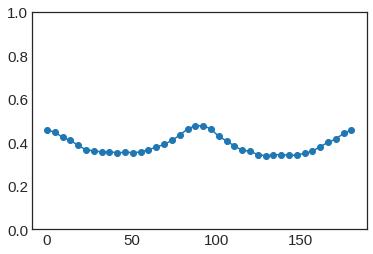

response size torch.Size([1, 192, 27, 27])


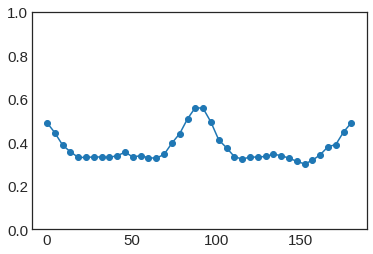

response size torch.Size([1, 192, 27, 27])


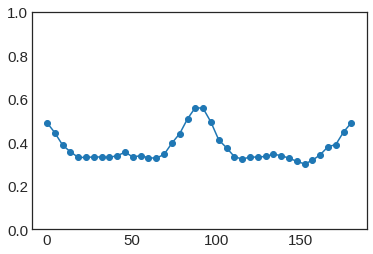

response size torch.Size([1, 192, 13, 13])


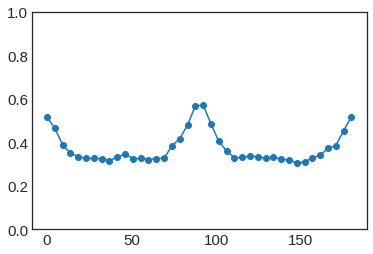

response size torch.Size([1, 384, 13, 13])


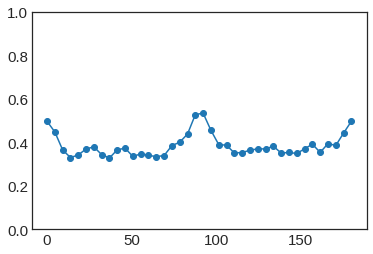

response size torch.Size([1, 384, 13, 13])


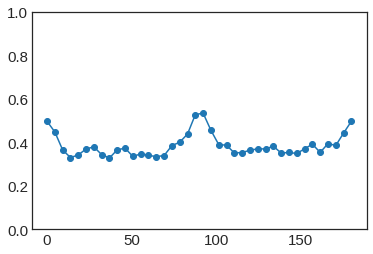

response size torch.Size([1, 256, 13, 13])


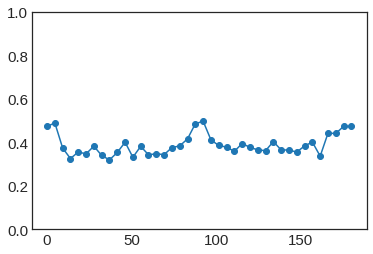

response size torch.Size([1, 256, 13, 13])


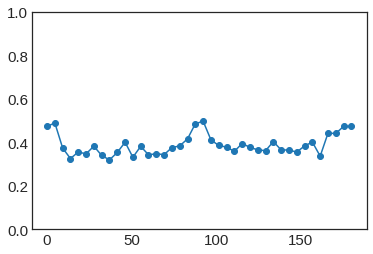

response size torch.Size([1, 256, 13, 13])


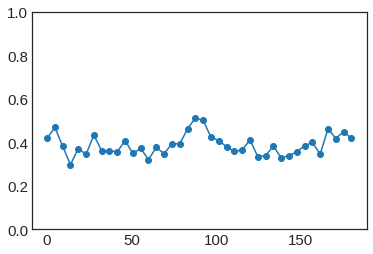

response size torch.Size([1, 256, 13, 13])


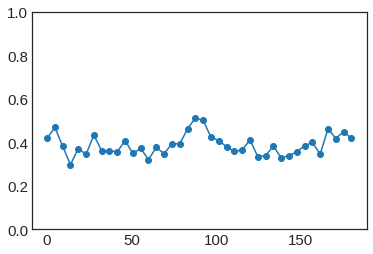

response size torch.Size([1, 256, 6, 6])


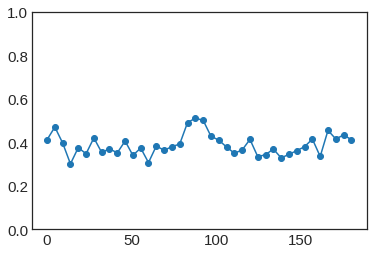

IndexError: index 13 is out of range

In [18]:

model = models.alexnet(pretrained=True)
# checkpoint = torch.load(which_alexnet)
# model.load_state_dict(checkpoint['state_dict'])

model.cuda().eval()
for i in range(30):
    fishers_alexnet = get_fisher_orientations(model,i,40, generator=None)
    norm = np.linalg.norm([thing.cpu() for thing in fishers_alexnet])
    plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet/norm),"-o")
    plt.ylim([0,1])
    plt.show()

response size torch.Size([1, 64, 224, 224])


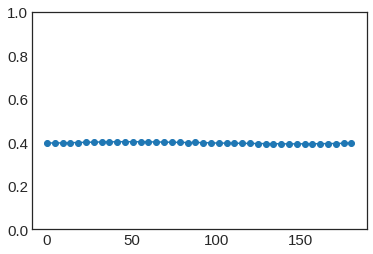

response size torch.Size([1, 64, 224, 224])


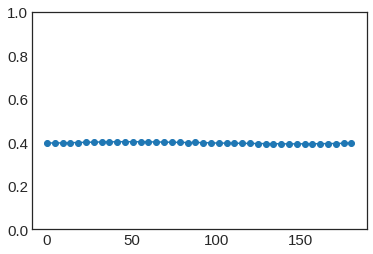

response size torch.Size([1, 64, 224, 224])


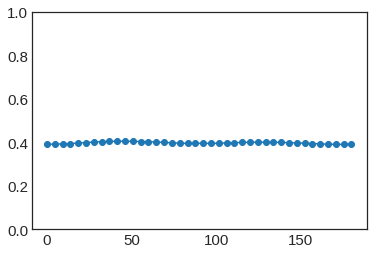

response size torch.Size([1, 64, 224, 224])


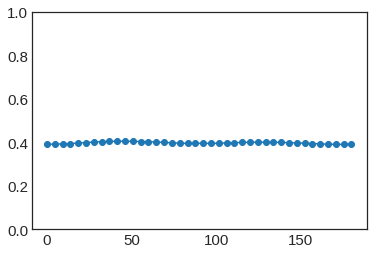

response size torch.Size([1, 64, 112, 112])


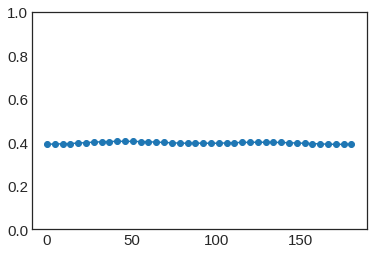

response size torch.Size([1, 128, 112, 112])


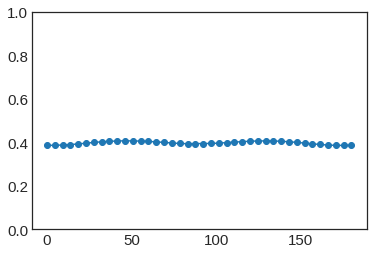

response size torch.Size([1, 128, 112, 112])


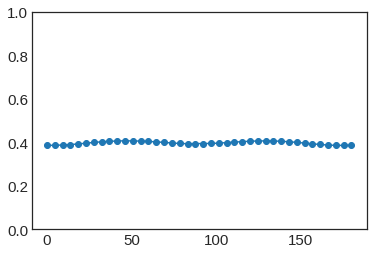

response size torch.Size([1, 128, 112, 112])


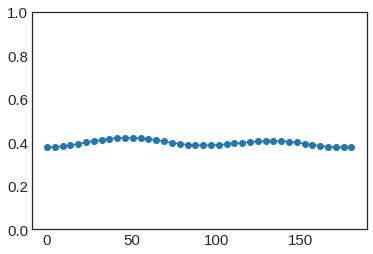

response size torch.Size([1, 128, 112, 112])


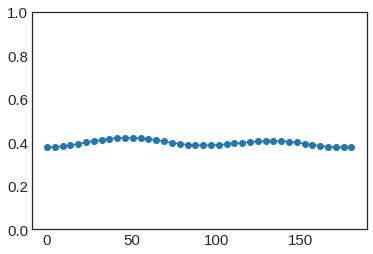

response size torch.Size([1, 128, 56, 56])


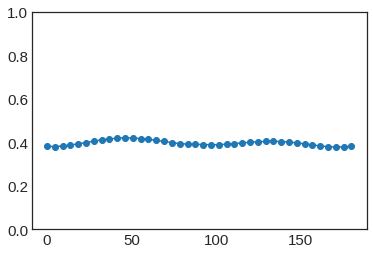

response size torch.Size([1, 256, 56, 56])


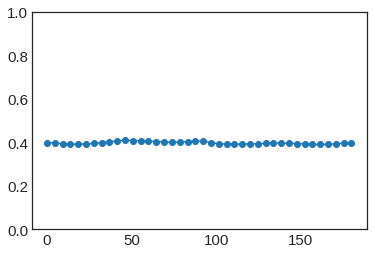

response size torch.Size([1, 256, 56, 56])


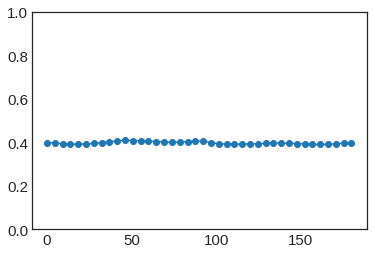

response size torch.Size([1, 256, 56, 56])


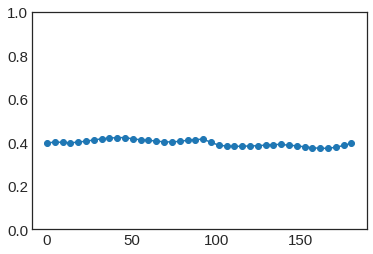

response size torch.Size([1, 256, 56, 56])


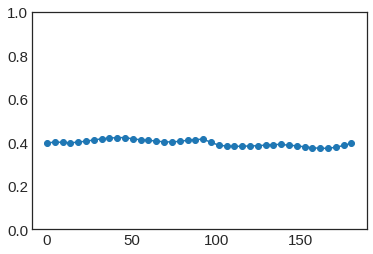

response size torch.Size([1, 256, 56, 56])


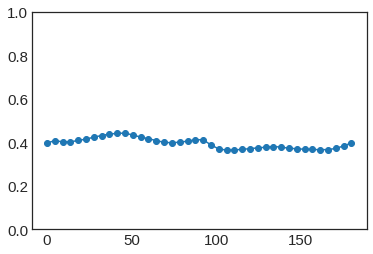

response size torch.Size([1, 256, 56, 56])


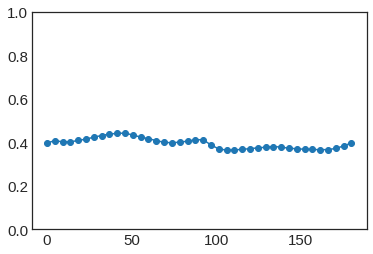

response size torch.Size([1, 256, 28, 28])


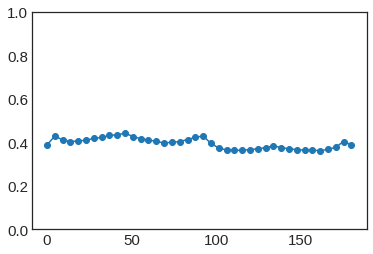

response size torch.Size([1, 512, 28, 28])


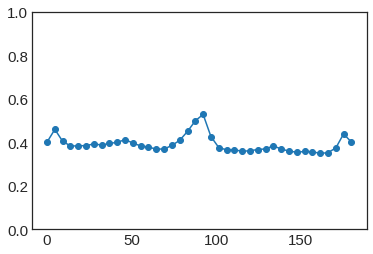

response size torch.Size([1, 512, 28, 28])


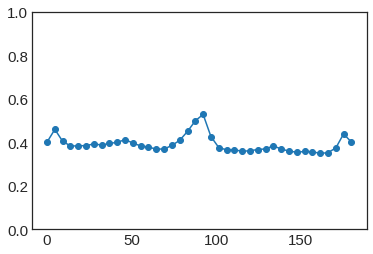

response size torch.Size([1, 512, 28, 28])


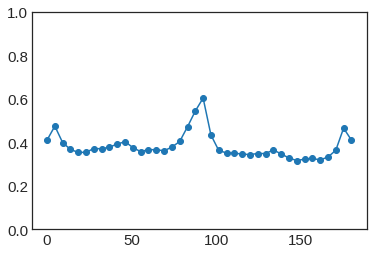

response size torch.Size([1, 512, 28, 28])


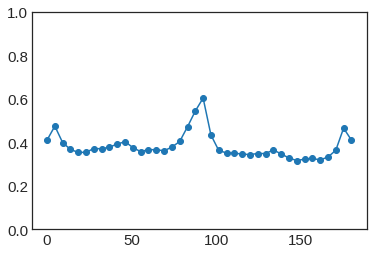

response size torch.Size([1, 512, 28, 28])


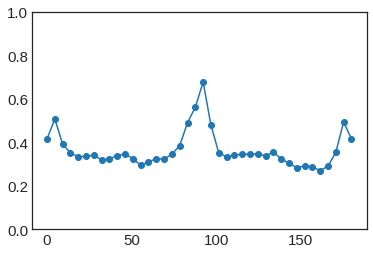

response size torch.Size([1, 512, 28, 28])


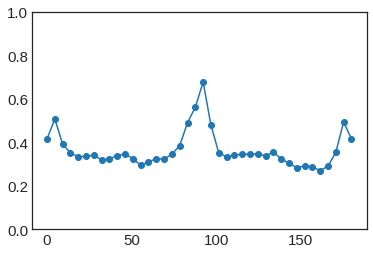

response size torch.Size([1, 512, 14, 14])


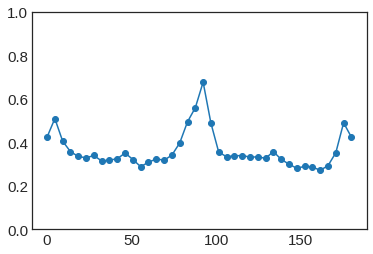

response size torch.Size([1, 512, 14, 14])


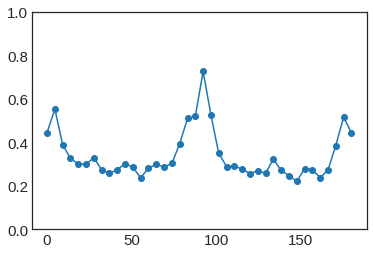

response size torch.Size([1, 512, 14, 14])


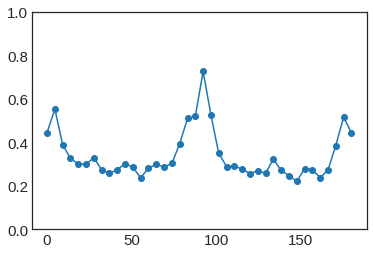

response size torch.Size([1, 512, 14, 14])


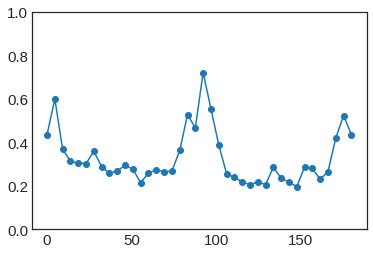

response size torch.Size([1, 512, 14, 14])


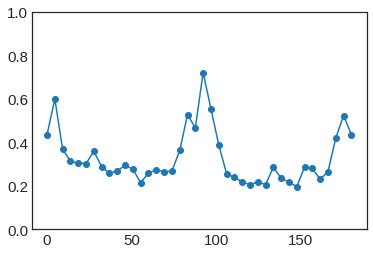

response size torch.Size([1, 512, 14, 14])


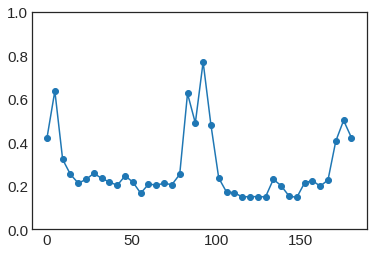

response size torch.Size([1, 512, 14, 14])


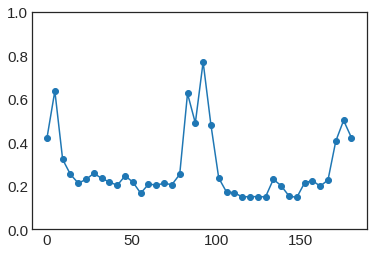

In [15]:
# m= m.cuda()
for i in range(30):
    fishers_alexnet = get_fisher_orientations(m,i,40, generator=generator_gabor)
    norm = np.linalg.norm([thing.cpu() for thing in fishers_alexnet])
    plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers_alexnet/norm),"-o")
    plt.ylim([0,1])
    plt.show()

response size torch.Size([1, 64, 224, 224])


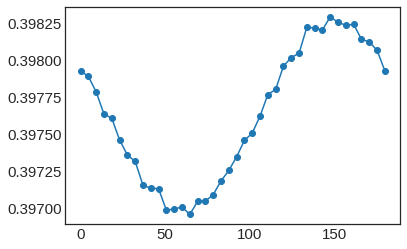

response size torch.Size([1, 64, 224, 224])


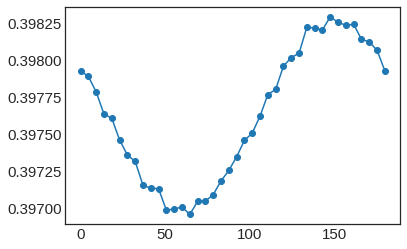

response size torch.Size([1, 64, 224, 224])


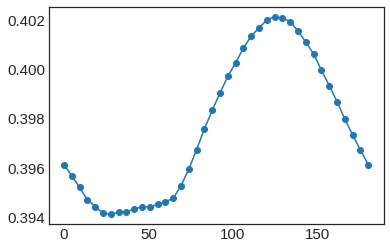

response size torch.Size([1, 64, 224, 224])


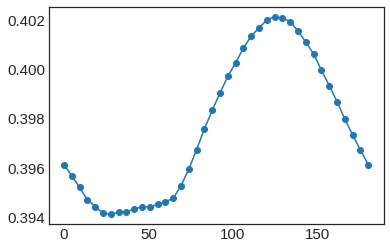

response size torch.Size([1, 64, 112, 112])


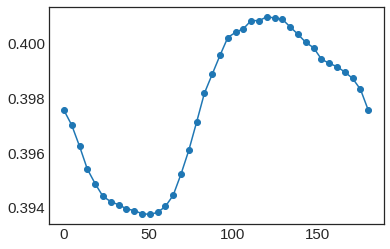

response size torch.Size([1, 128, 112, 112])


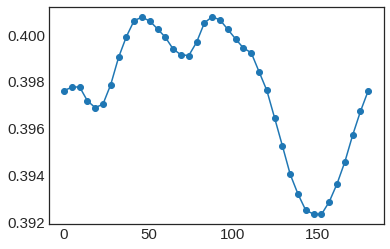

response size torch.Size([1, 128, 112, 112])


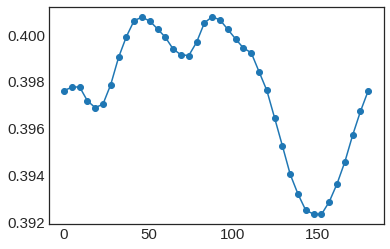

response size torch.Size([1, 128, 112, 112])


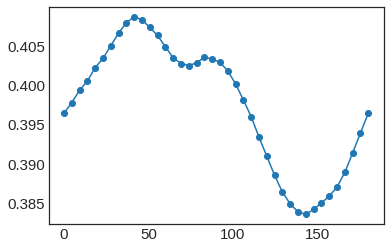

response size torch.Size([1, 128, 112, 112])


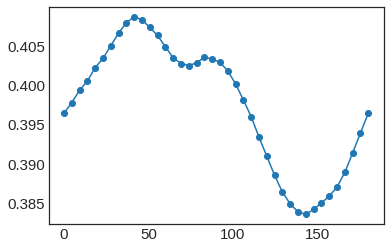

response size torch.Size([1, 128, 56, 56])


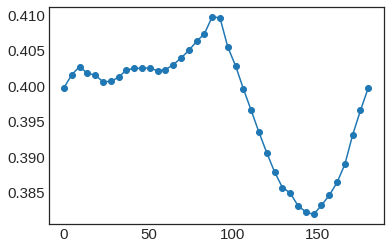

response size torch.Size([1, 256, 56, 56])


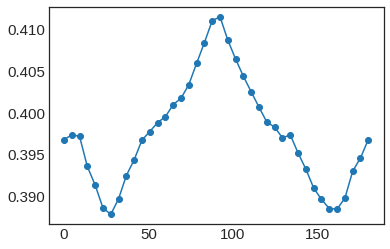

response size torch.Size([1, 256, 56, 56])


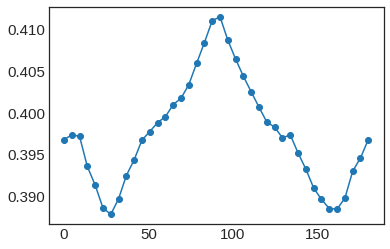

response size torch.Size([1, 256, 56, 56])


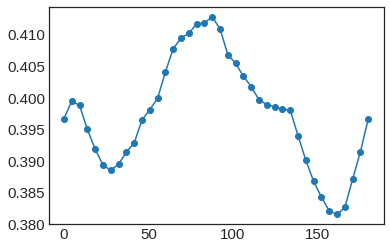

response size torch.Size([1, 256, 56, 56])


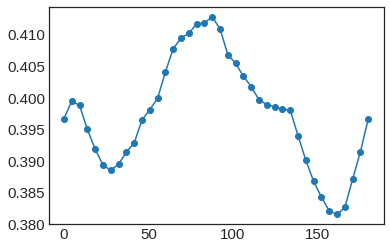

response size torch.Size([1, 256, 56, 56])


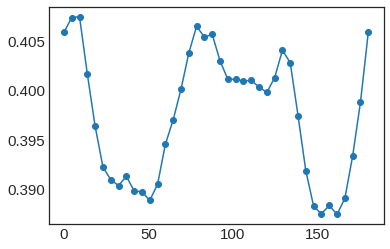

response size torch.Size([1, 256, 56, 56])


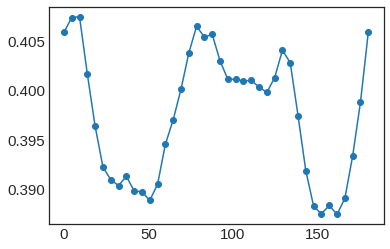

response size torch.Size([1, 256, 28, 28])


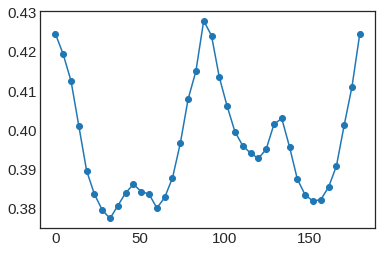

response size torch.Size([1, 512, 28, 28])


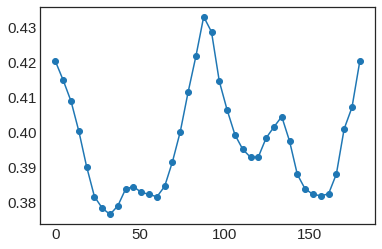

response size torch.Size([1, 512, 28, 28])


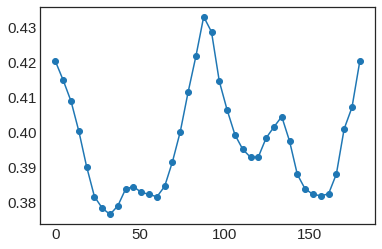

response size torch.Size([1, 512, 28, 28])


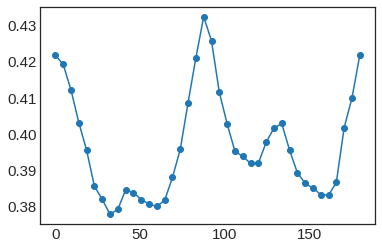

response size torch.Size([1, 512, 28, 28])


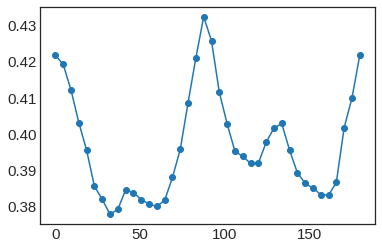

response size torch.Size([1, 512, 28, 28])


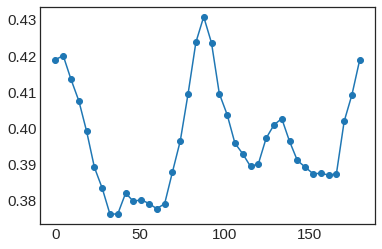

response size torch.Size([1, 512, 28, 28])


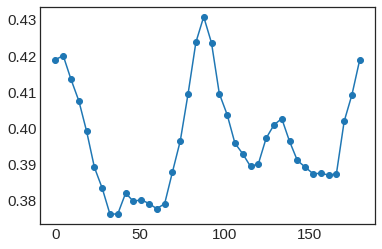

response size torch.Size([1, 512, 14, 14])


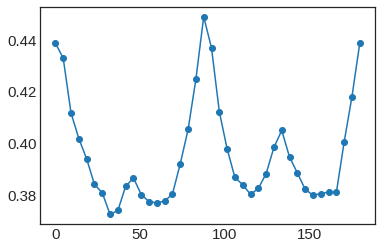

response size torch.Size([1, 512, 14, 14])


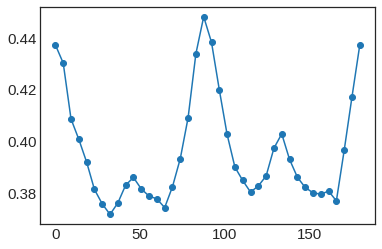

response size torch.Size([1, 512, 14, 14])


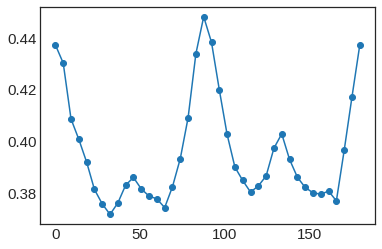

response size torch.Size([1, 512, 14, 14])


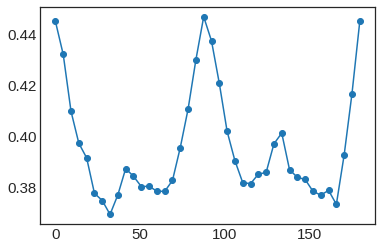

response size torch.Size([1, 512, 14, 14])


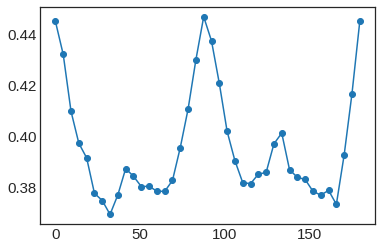

response size torch.Size([1, 512, 14, 14])


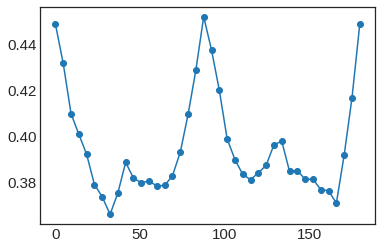

response size torch.Size([1, 512, 14, 14])


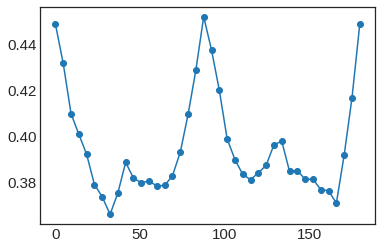

In [20]:
vgg_untrained  = models.vgg16(pretrained=False)
vgg_untrained= vgg_untrained.cuda()
for i in range(30):
    fishers = get_fisher_orientations(vgg_untrained,i,40, generator=generator_grating)
    norm = np.linalg.norm([thing.cpu() for thing in fishers])
    plt.plot(np.linspace(0, 180, 40),np.sqrt(fishers/norm),"-o")
#     plt.ylim([0,1])
    plt.show()